***Loading Data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/predictive_maintenance.csv')

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


***Data Inspection***

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


1️⃣ UID - Unique identifier for each record. - Not a feature for modeling (used only for indexing).

2️⃣ productID - Product code combining quality level and serial number. - Example: "L4713" → Low-quality product, serial no. 4713.

3️⃣ air temperature [K] - Ambient air temperature around the machine (Kelvin). - Generated around 300 K with small random variation (~±2 K).

4️⃣ process temperature [K] - Internal process temperature (Kelvin). - Always about 10 K higher than air temperature. - Important indicator of overheating or energy inefficiency.

5️⃣ rotational speed [rpm] - Rotational speed of the main motor shaft (revolutions per minute). - Based on a 2860 W power baseline with small random noise.

6️⃣ torque [Nm] - Torque generated during operation (Newton-meter). - Normally distributed around 40 Nm (σ = 10 Nm). - Key factor in mechanical stress and failure analysis.

7️⃣ tool wear [min] - Total minutes the tool has been used. - Tool wear increases with product quality: - High (H): +5 min - Medium (M): +3 min - Low (L): +2 min - High wear often correlates with higher failure risk.

8️⃣ Machine failure (Target) - Binary target variable. - 0 → Machine operating normally. - 1 → Machine has failed. - This is the main prediction target for our ML model.

9️⃣ Failure Type (Target 2) - Multiclass label describing the type of failure (if any): - TWF → Tool Wear Failure - HDF → Heat Dissipation Failure - PWF → Power Failure - OSF → Overstrain Failure - RNF → Random Failure - No Failure → Normal state - Used for deeper classification analysis (optional).

NOTES: • UID is excluded from modeling. • productID will be split to extract 'product_quality' (L/M/H). • air/process temperatures, rotational speed, torque, and tool wear are continuous numerical features for analysis. • Machine failure is our primary target. • Failure type is secondary (multiclass optional target).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [ ]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [ ]:
df['Product ID'].nunique()

10000

In [ ]:
df['UDI'].nunique()

10000

***Preprocessing***

In [ ]:
df.drop(columns=['UDI','Product ID'],inplace=True)

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [ ]:
df = df.rename(mapper={'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque',
                       'Tool wear [min]': 'Tool wear'}, axis=1)

In [ ]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Target', 'Failure Type'],
      dtype='object')

Encoding

In [ ]:
type_mapping = {'L': 0, 'M': 1, 'H':2}
df['Type'] = df['Type'].map(type_mapping)

In [ ]:
df['Type'].value_counts()

,count
Type,
0,6000
1,2997
2,1003


In [ ]:
failure_mapping = {
    'No Failure': 0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4,
    'Random Failures': 5
}

df['Failure Type'] = df['Failure Type'].map(failure_mapping)

In [ ]:
df['Failure Type'].value_counts()

,count
Failure Type,
0,9652
1,112
2,95
3,78
4,45
5,18


Outliers

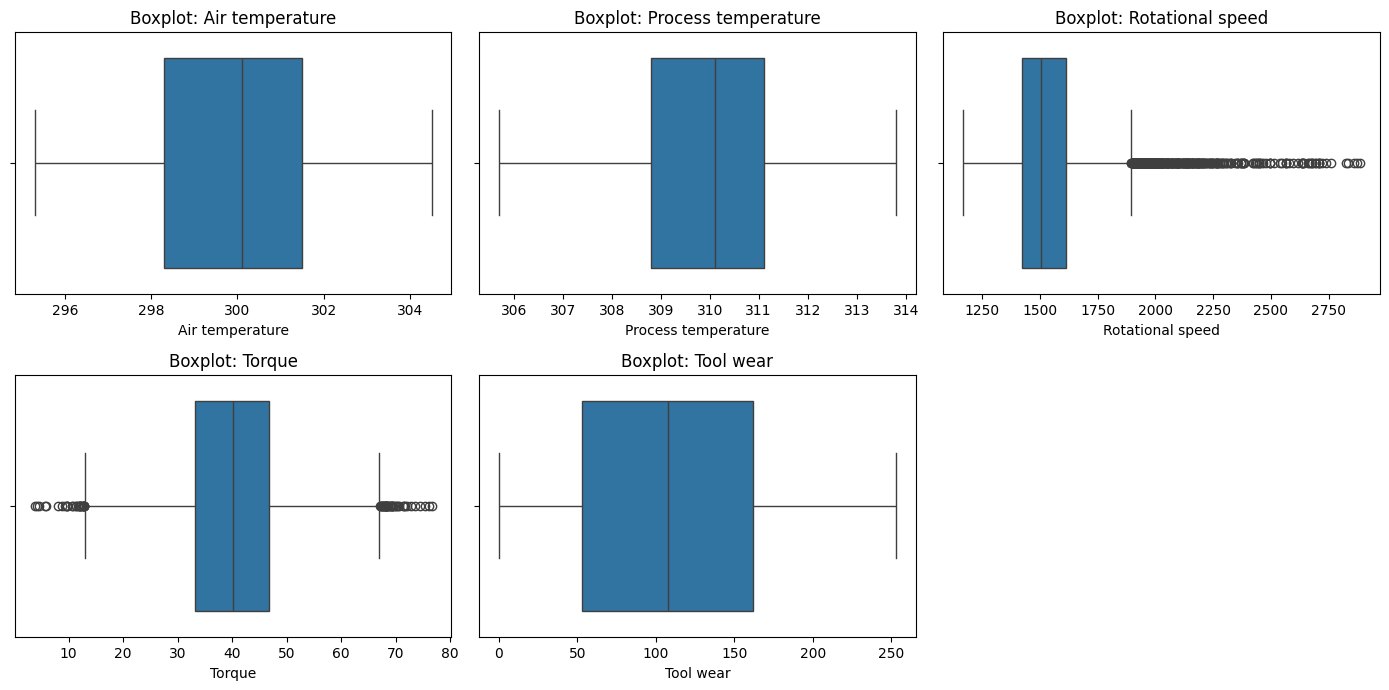

In [ ]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()

In [ ]:
cols_with_outliers = ['Rotational speed', 'Torque','Tool wear']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

df_clean = df.copy()
for col in cols_with_outliers:
    before = df_clean.shape[0]
    df_clean = remove_outliers_iqr(df_clean, col)
    after = df_clean.shape[0]
    print(f"{col}: Removed {before - after} outliers")

df_clean.shape

Rotational speed: Removed 418 outliers
Torque: Removed 47 outliers
Tool wear: Removed 0 outliers


(9535, 8)

Shape before: (10000, 8)
Shape after : (9535, 8)
Rows removed: 465 (4.65%)



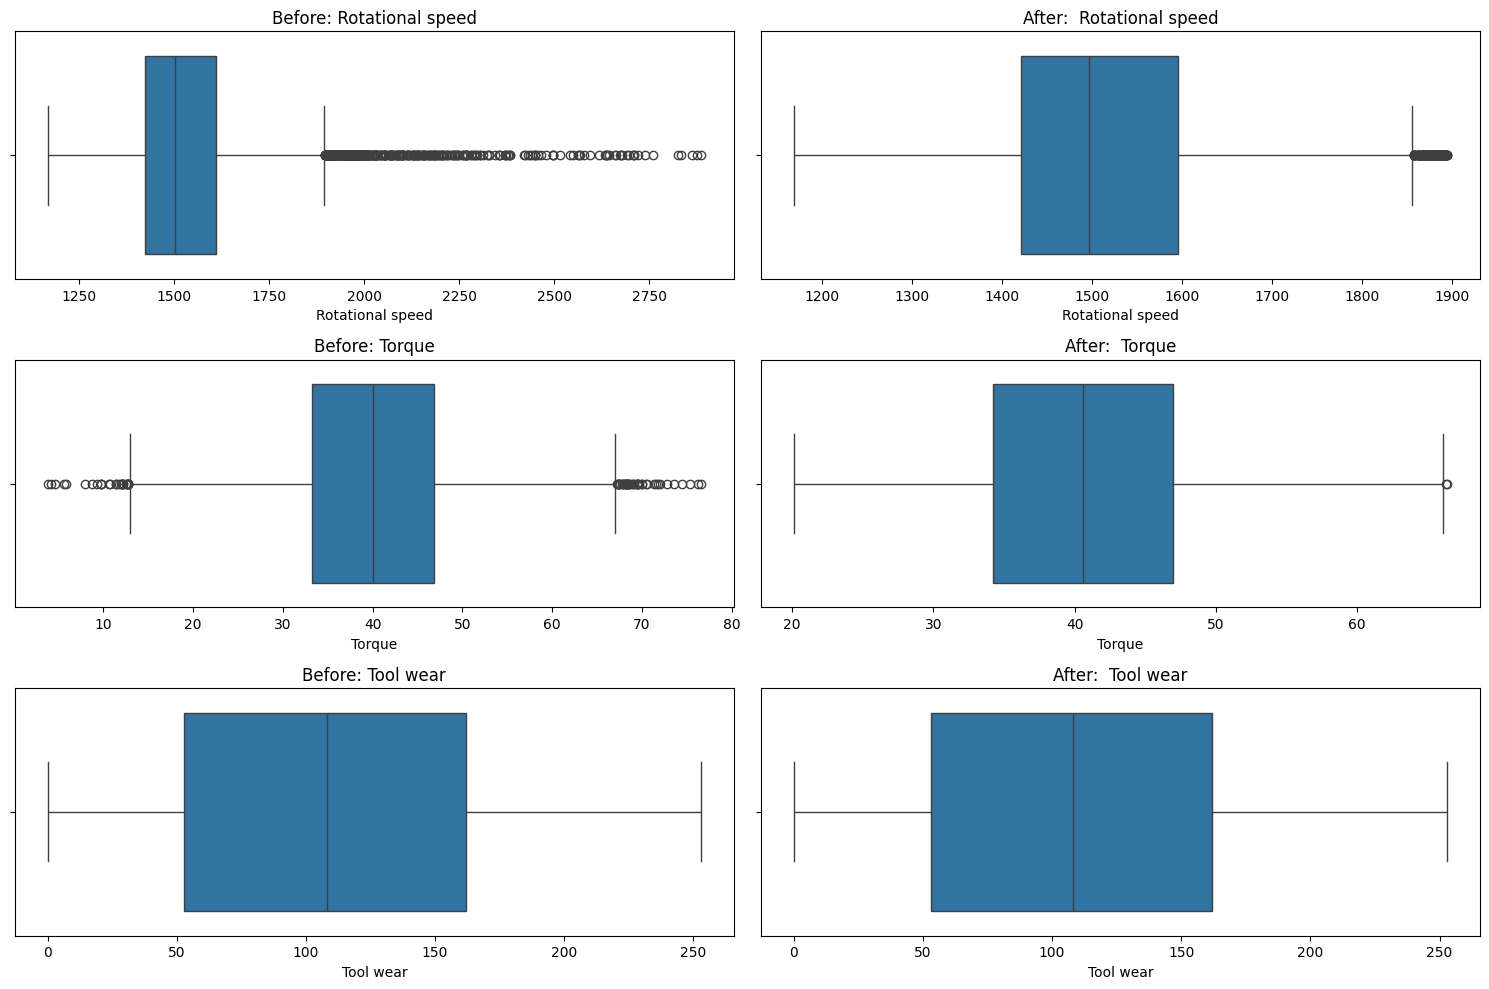

In [ ]:
print("Shape before:", df.shape)
print("Shape after :", df_clean.shape)
print("Rows removed:", df.shape[0] - df_clean.shape[0],
      f"({(df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100:.2f}%)\n")
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.boxplot(x=df[col])
    plt.title(f"Before: {col}")
    plt.subplot(3, 2, 2*i)
    sns.boxplot(x=df_clean[col])
    plt.title(f"After:  {col}")
plt.tight_layout()
plt.show()

***EDA***

In [ ]:
df_clean.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Target', 'Failure Type'],
      dtype='object')

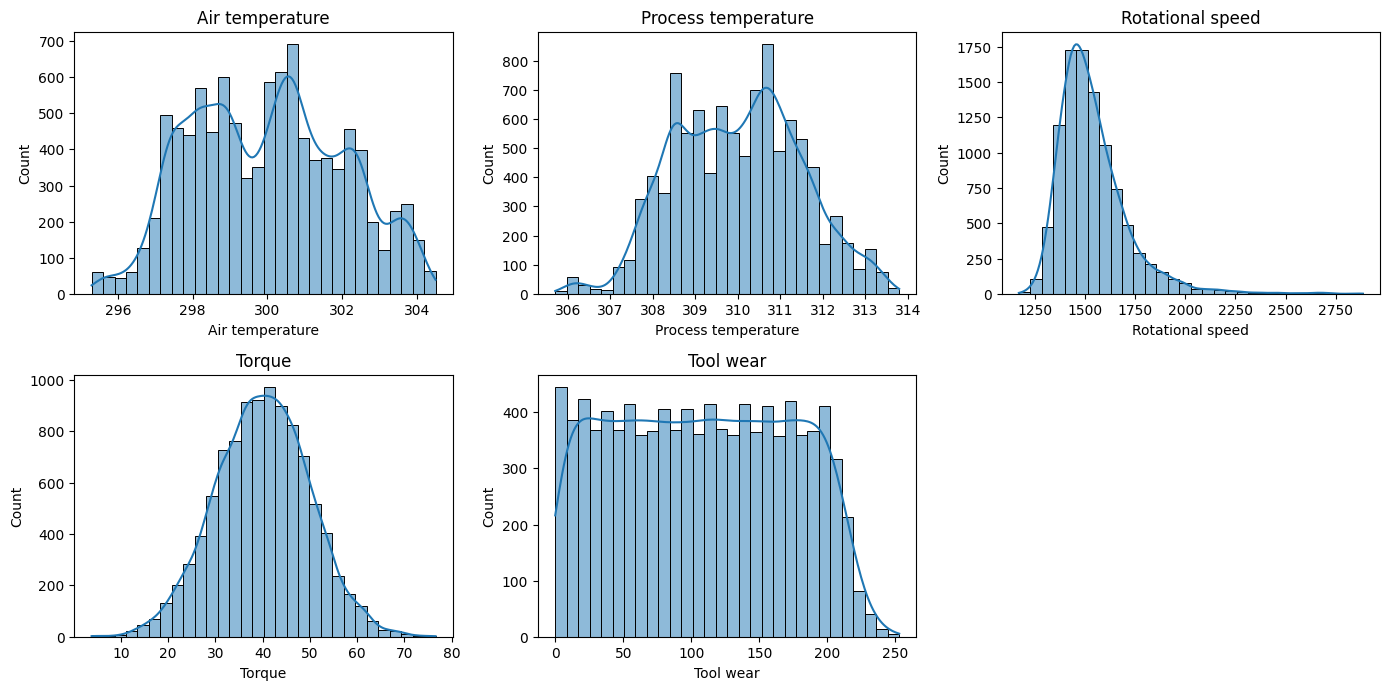

In [ ]:
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()

Target,0,1
Type,,
0,96.083,3.917
1,97.231,2.769
2,97.906,2.094


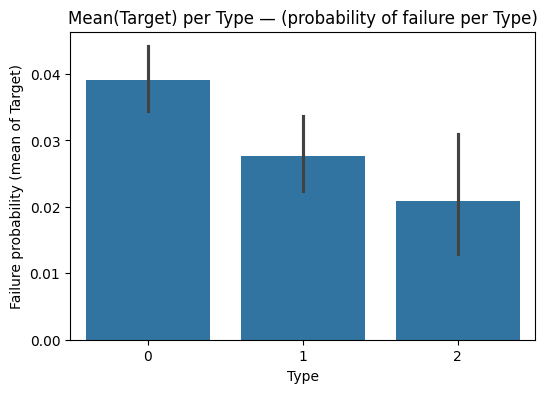

In [ ]:
ct = pd.crosstab(df['Type'], df['Target'], normalize='index') * 100
display(ct.round(3))
plt.figure(figsize=(6,4))
sns.barplot(x=df['Type'], y=df['Target'])
plt.title("Mean(Target) per Type — (probability of failure per Type)")
plt.ylabel("Failure probability (mean of Target)")
plt.show()


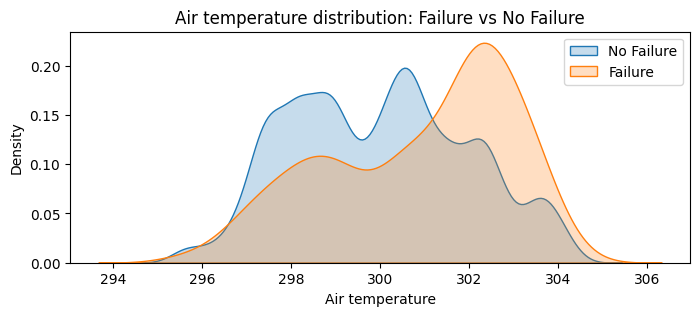

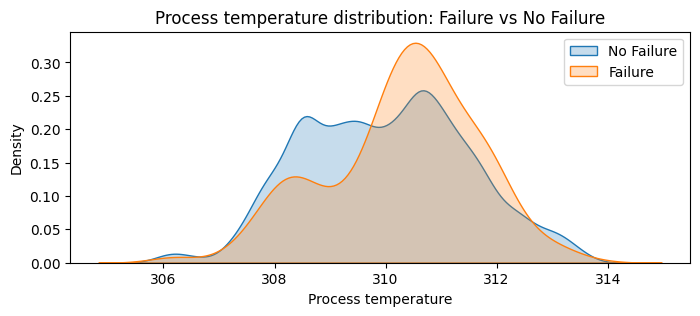

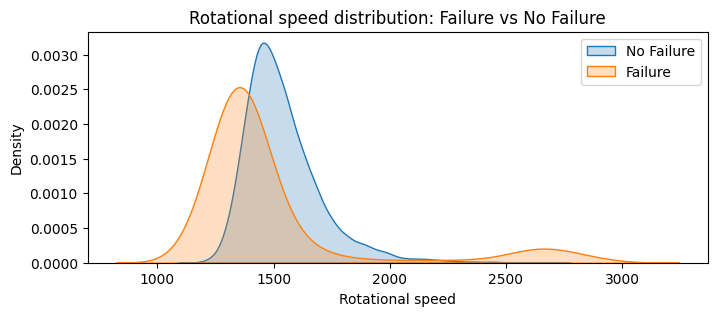

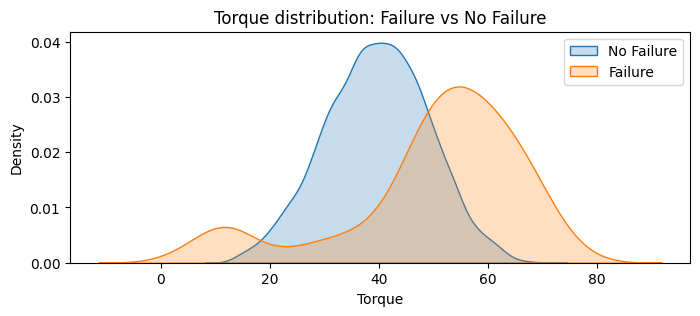

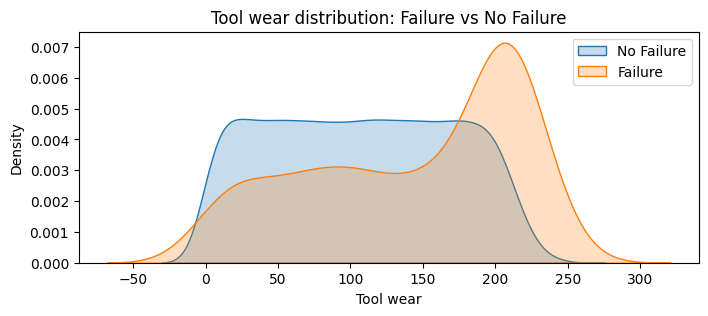

In [ ]:
fail = df[df['Target']==1]
ok   = df[df['Target']==0]

for col in num_cols:
    plt.figure(figsize=(8,3))
    sns.kdeplot(ok[col], label='No Failure', fill=True)
    sns.kdeplot(fail[col], label='Failure', fill=True)
    plt.title(f"{col} distribution: Failure vs No Failure")
    plt.legend()
    plt.show()

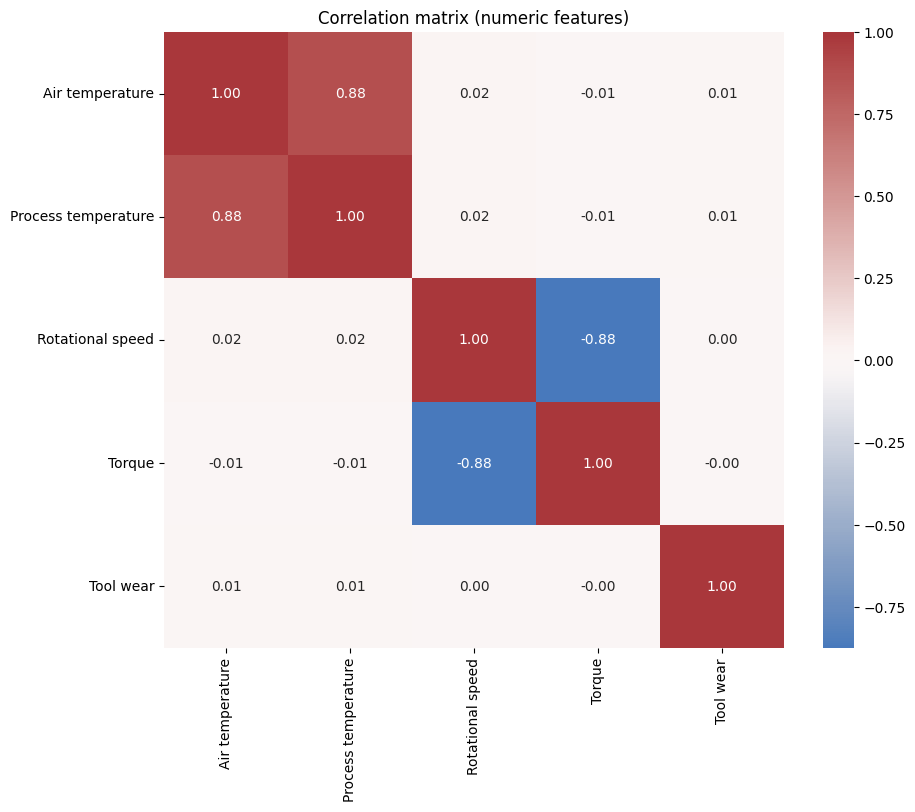

In [ ]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation matrix (numeric features)")
plt.show()

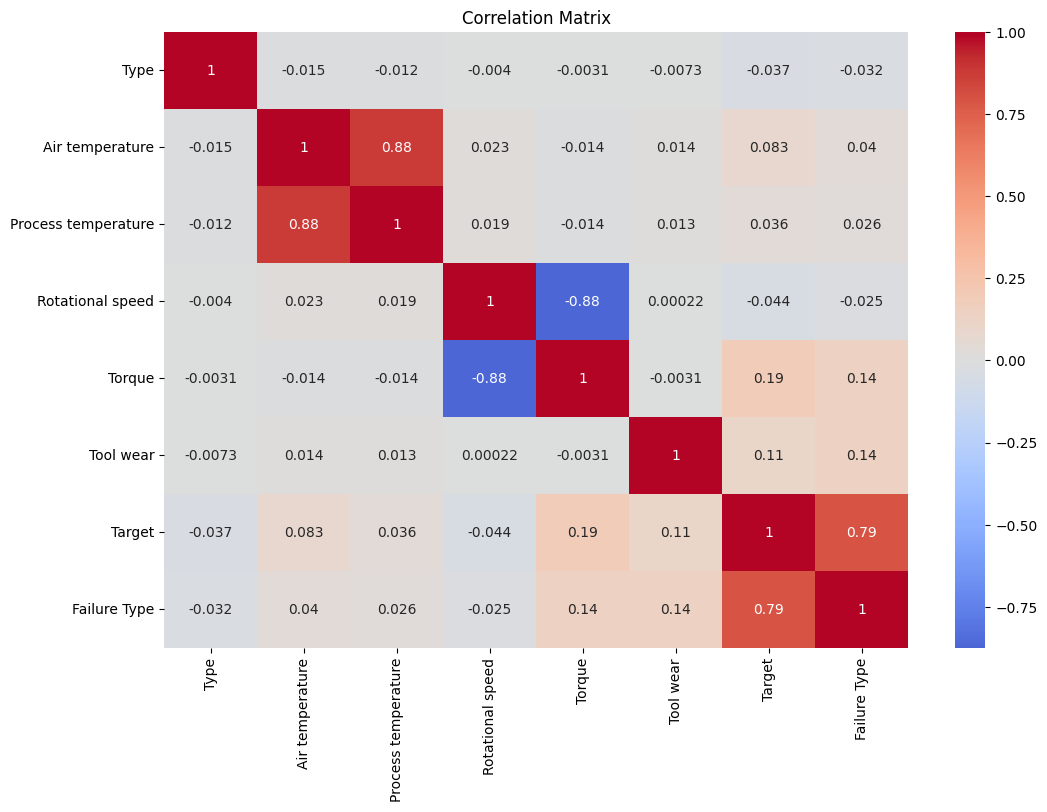

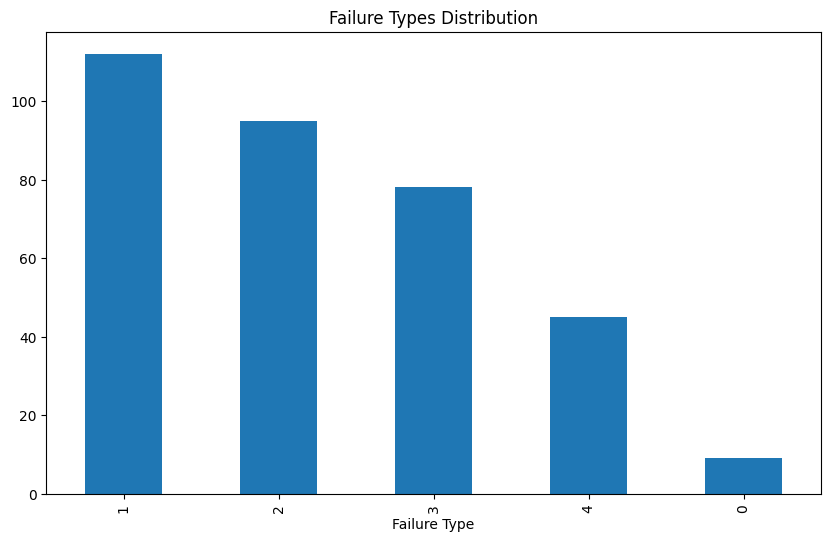

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(10, 6))
failure_counts = df[df['Target'] == 1]['Failure Type'].value_counts()
failure_counts.plot(kind='bar')
plt.title('Failure Types Distribution')
plt.show()

***Feature Engineering***

In [ ]:
df1 = df_clean.copy()
df1['temp_diff'] = df1['Process temperature'] - df1['Air temperature']
df1['torque_per_rpm'] = df1['Torque'] / (df1['Rotational speed'] + 1e-6)
df1['wear_per_rpm'] = df1['Tool wear'] / (df1['Rotational speed'] + 1e-6)

display(df1[['temp_diff','torque_per_rpm','wear_per_rpm']].describe().T)


,count,mean,std,min,25%,50%,75%,max
temp_diff,9535.0,10.006869,1.000099,7.600000,9.300000,9.800000,11.000000,12.100000
torque_per_rpm,9535.0,0.027536,0.007991,0.010612,0.021523,0.027165,0.032990,0.055800
wear_per_rpm,9535.0,0.071769,0.042772,0.000000,0.035200,0.070994,0.106939,0.182553


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib
import os
feature_cols = [
    'Air temperature', 'Process temperature', 'Rotational speed',
    'Torque', 'Tool wear', 'Type','temp_diff','torque_per_rpm','wear_per_rpm']
missing_cols = [c for c in feature_cols if c not in df1.columns]
if missing_cols:
    raise ValueError("Missing feature columns: " + str(missing_cols))

X = df1[feature_cols].copy()
y = df1['Target'].copy()

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
os.makedirs('models', exist_ok=True)
joblib.dump(scaler, 'models/standard_scaler.joblib')
joblib.dump(feature_cols, 'models/feature_cols.joblib')

print("Scaling done. Scaler and feature list saved to /models.")
display(X_scaled.describe().T)


Scaling done. Scaler and feature list saved to /models.


,count,mean,std,min,25%,50%,75%,max
Air temperature,9535.0,-1.533312e-14,1.000052,-2.352055,-0.848653,0.053388,0.754975,2.258377
Process temperature,9535.0,5.293860e-15,1.000052,-2.903406,-0.810416,0.067289,0.742447,2.565374
Rotational speed,9535.0,8.252095e-16,1.000052,-2.676846,-0.727055,-0.141347,0.613908,2.925913
Torque,9535.0,-4.722669e-16,1.000052,-2.322183,-0.737871,-0.018751,0.700369,2.880202
Tool wear,9535.0,9.687526e-17,1.000052,-1.699001,-0.865377,-0.000295,0.849058,2.280374
Type,9535.0,-8.718773e-17,1.000052,-0.746444,-0.746444,-0.746444,0.740984,2.228412
temp_diff,9535.0,-7.153865e-16,1.000052,-2.406758,-0.706837,-0.206860,0.993085,2.093034
torque_per_rpm,9535.0,9.314928e-18,1.000052,-2.117808,-0.752392,-0.046345,0.682525,3.537076
wear_per_rpm,9535.0,1.155051e-16,1.000052,-1.678026,-0.855020,-0.018116,0.822328,2.590239


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train Target distribution:\n", y_train.value_counts(normalize=True))
print("Test  Target distribution:\n", y_test.value_counts(normalize=True))


Train shape: (7628, 9)  Test shape: (1907, 9)
Train Target distribution:
 Target
0    0.97247
1    0.02753
Name: proportion, dtype: float64
Test  Target distribution:
 Target
0    0.972208
1    0.027792
Name: proportion, dtype: float64


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1854
           1       0.95      0.68      0.79        53

    accuracy                           0.99      1907
   macro avg       0.97      0.84      0.89      1907
weighted avg       0.99      0.99      0.99      1907


AUC-ROC: 0.983075858419328


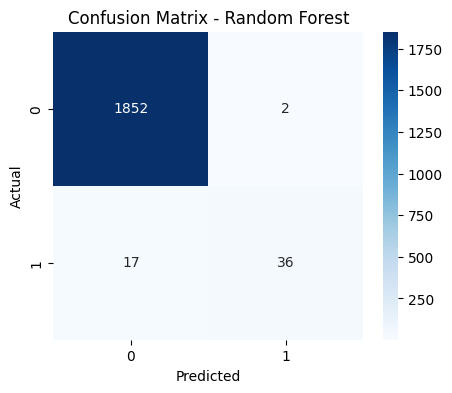

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',   # imbalance
    random_state=42
)

rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("\nAUC-ROC:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
!pip install xgboost


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: Target
0    7418
1     210
Name: count, dtype: int64
After SMOTE: Target
0    7418
1    7418
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.1,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1854
           1       0.58      0.91      0.71        53

    accuracy                           0.98      1907
   macro avg       0.79      0.94      0.85      1907
weighted avg       0.99      0.98      0.98      1907

AUC-ROC: 0.9910545276912743
